## Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    fbeta_score, classification_report, confusion_matrix, precision_recall_curve,
    make_scorer
)

from imblearn.over_sampling import SMOTE


## Data loading

Load the training and validation datasets.


In [12]:
train_df = pd.read_csv('train_dataset_final1.csv', sep=',', engine='python', on_bad_lines='skip')
validate_df = pd.read_csv('validate_dataset_final.csv', sep=',', engine='python', on_bad_lines='skip')
display(train_df.head())
display(validate_df.head())

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


## Data exploration


Shape of the DataFrame: (25247, 27)

Data Types:
 Customer_ID             int64
marriage                int64
sex                     int64
education               int64
LIMIT_BAL               int64
age                   float64
pay_0                   int64
pay_2                   int64
pay_3                   int64
pay_4                   int64
pay_5                   int64
pay_6                   int64
Bill_amt1             float64
Bill_amt2             float64
Bill_amt3             float64
Bill_amt4             float64
Bill_amt5             float64
Bill_amt6             float64
pay_amt1              float64
pay_amt2              float64
pay_amt3              float64
pay_amt4              float64
pay_amt5              float64
pay_amt6              float64
AVG_Bill_amt          float64
PAY_TO_BILL_ratio     float64
next_month_default      int64
dtype: object

Descriptive Statistics:
         Customer_ID      marriage           sex     education       LIMIT_BAL  \
count  25247.000000

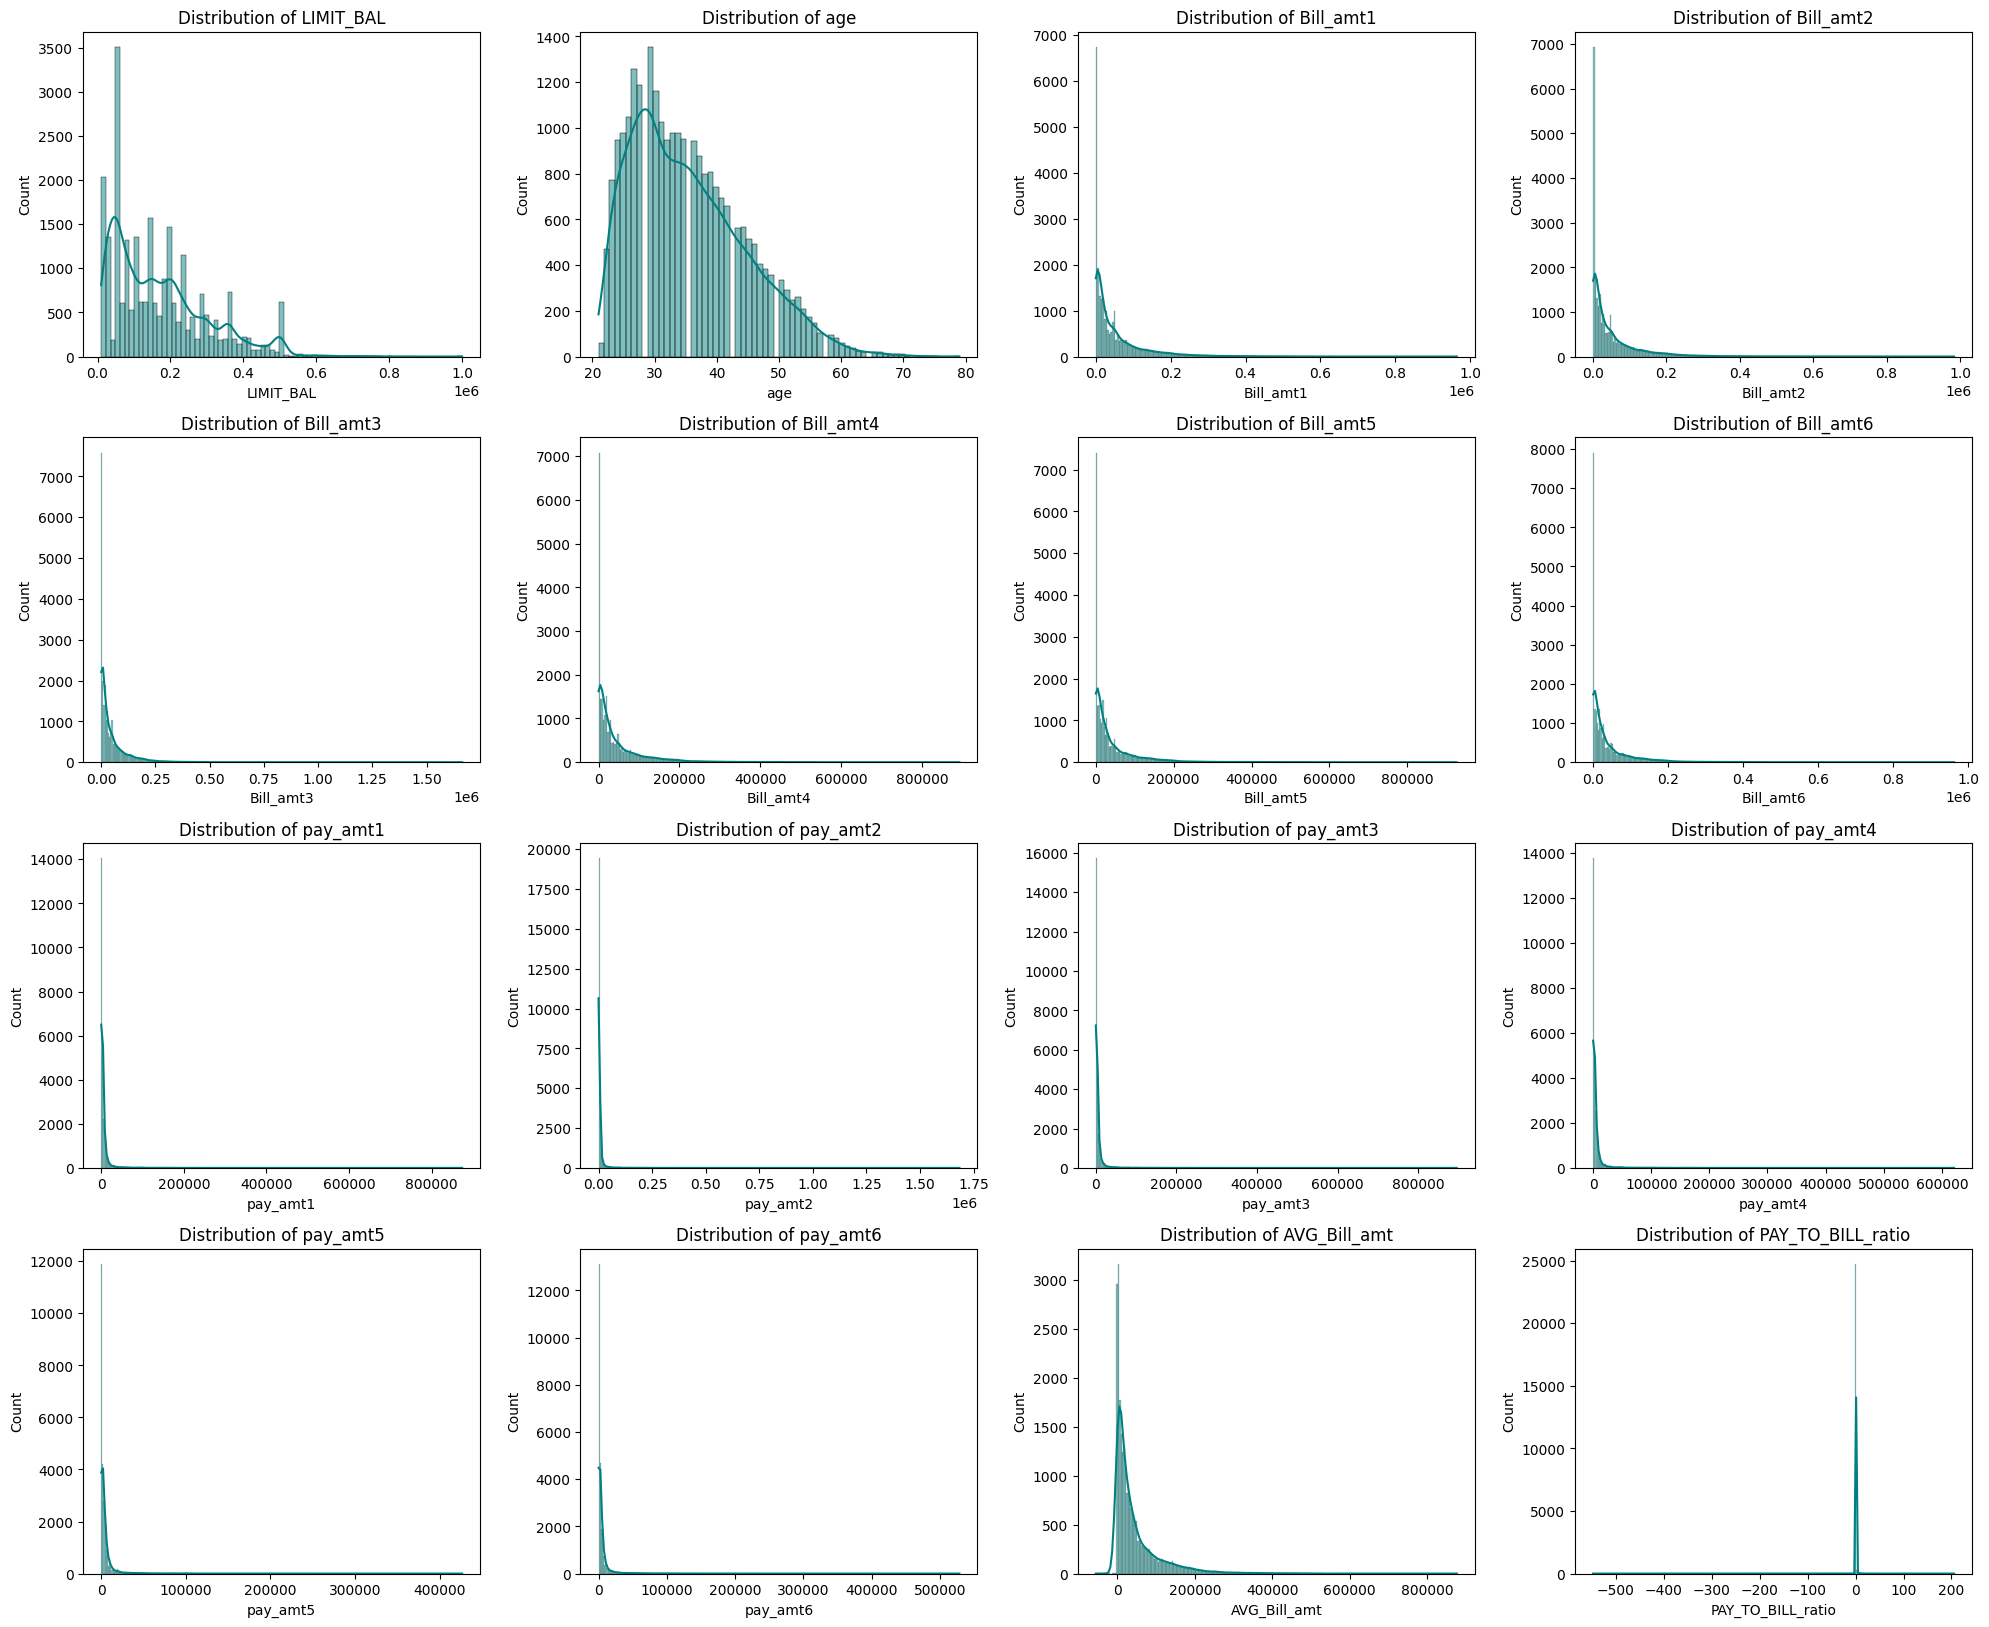

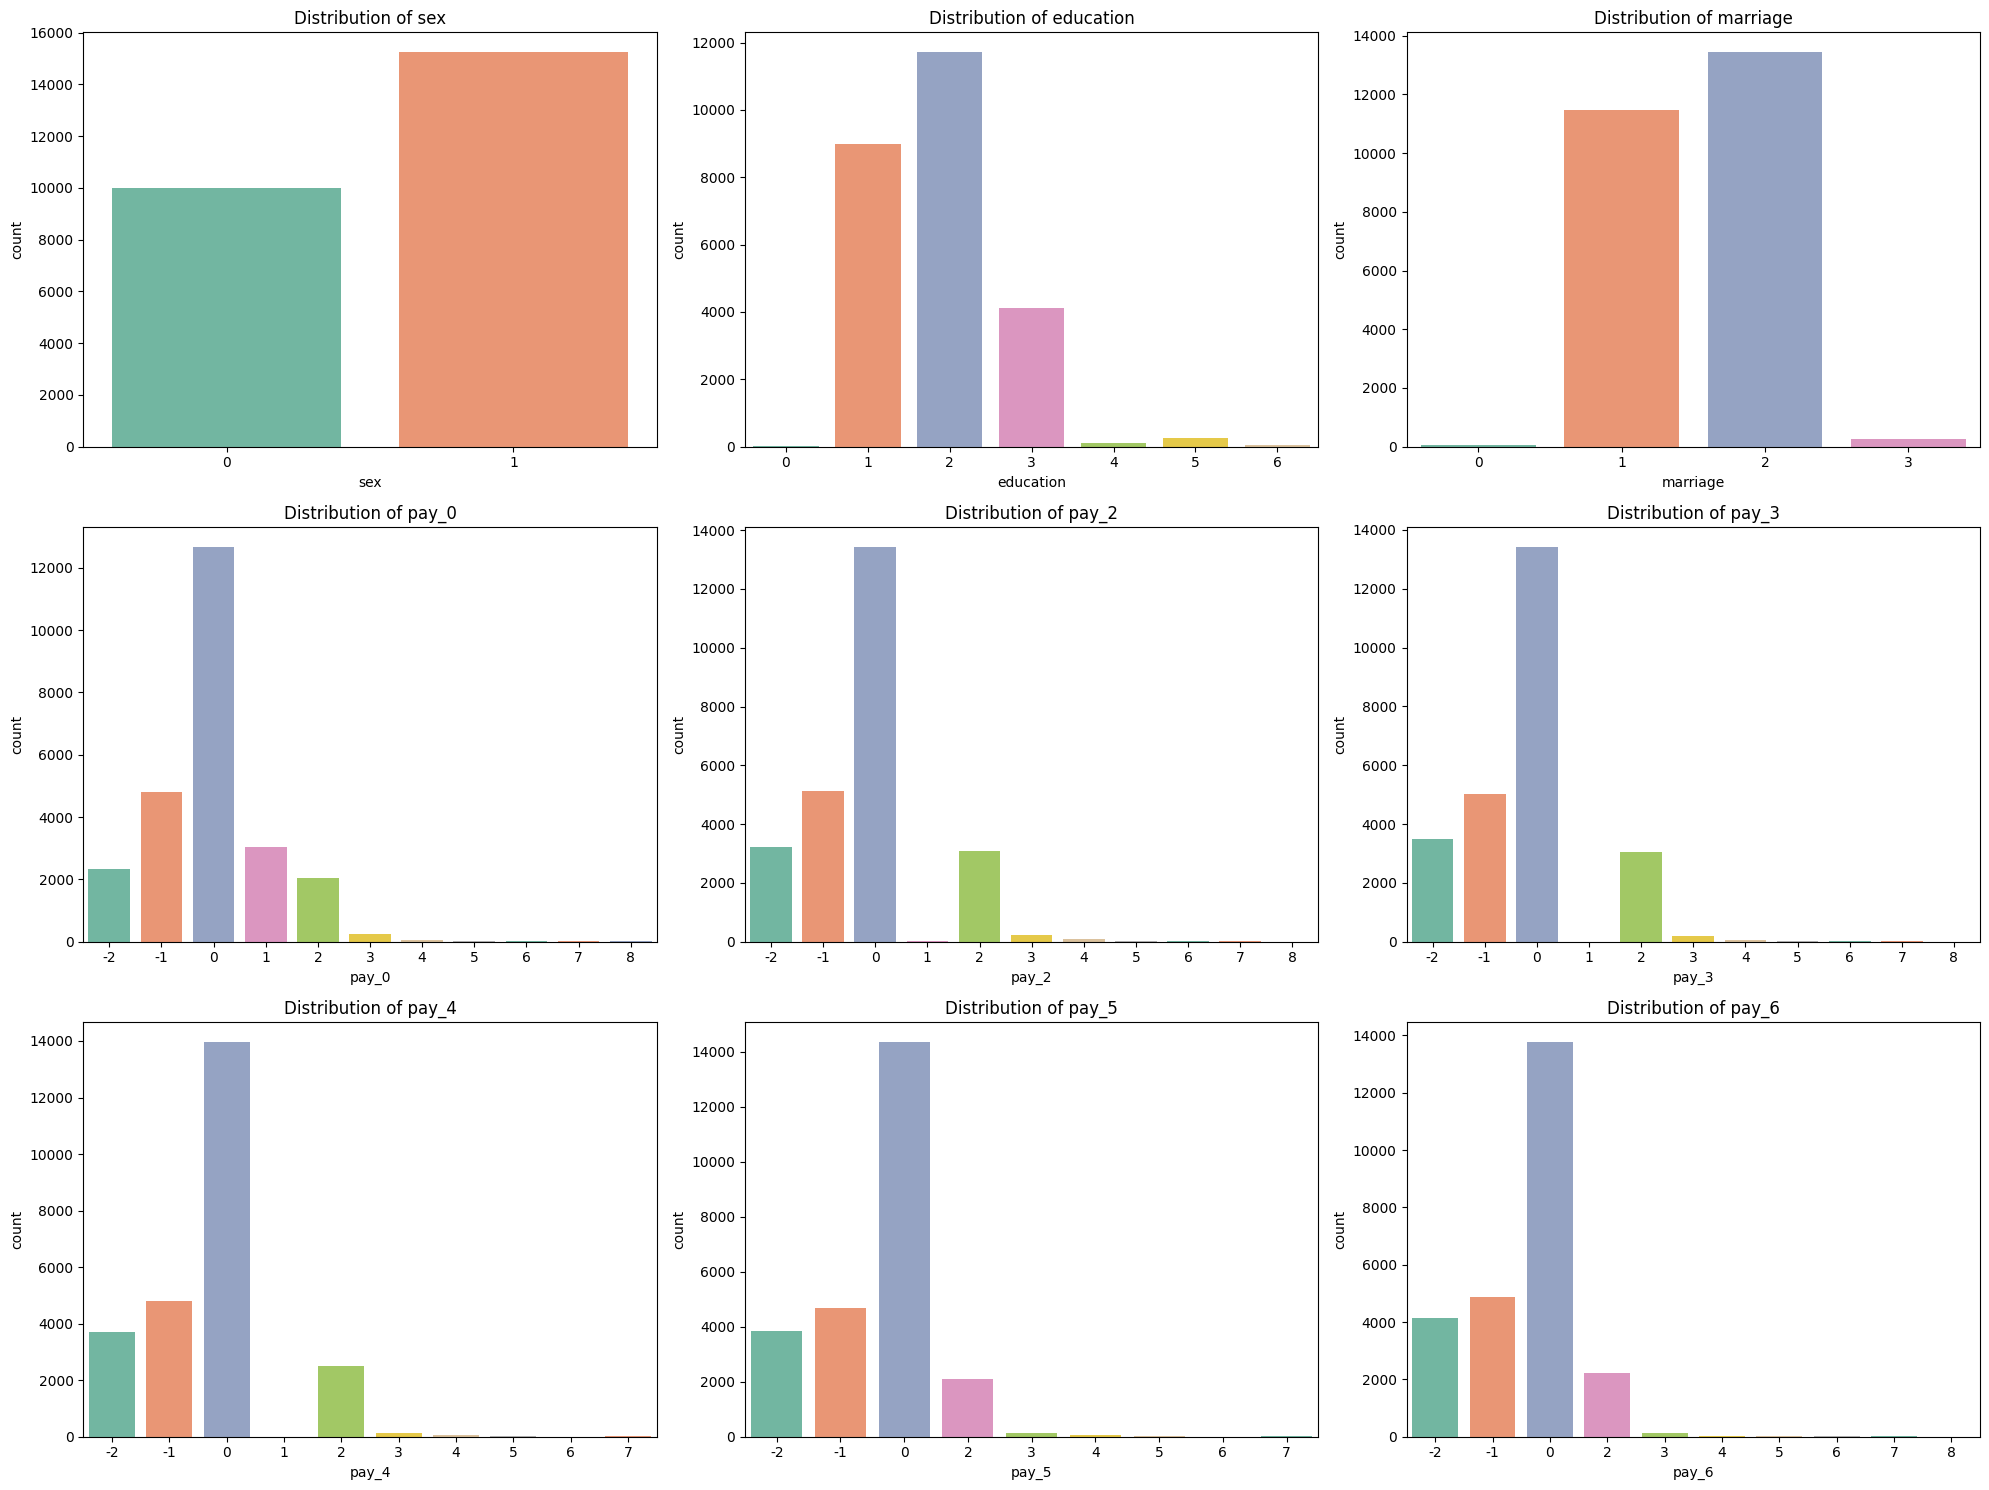

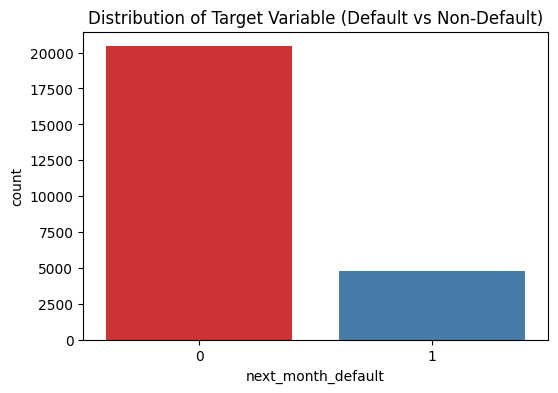

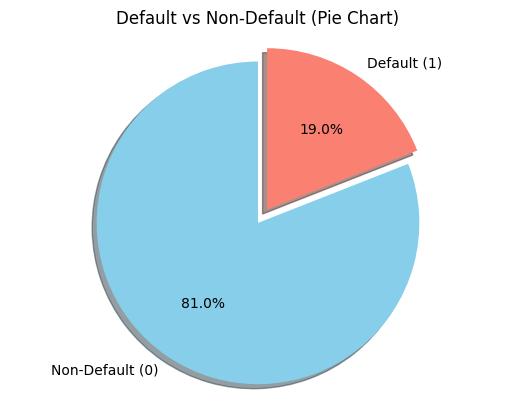


Class Imbalance:
next_month_default
0    20440
1     4807
Name: count, dtype: int64
next_month_default
0    80.960114
1    19.039886
Name: count, dtype: float64


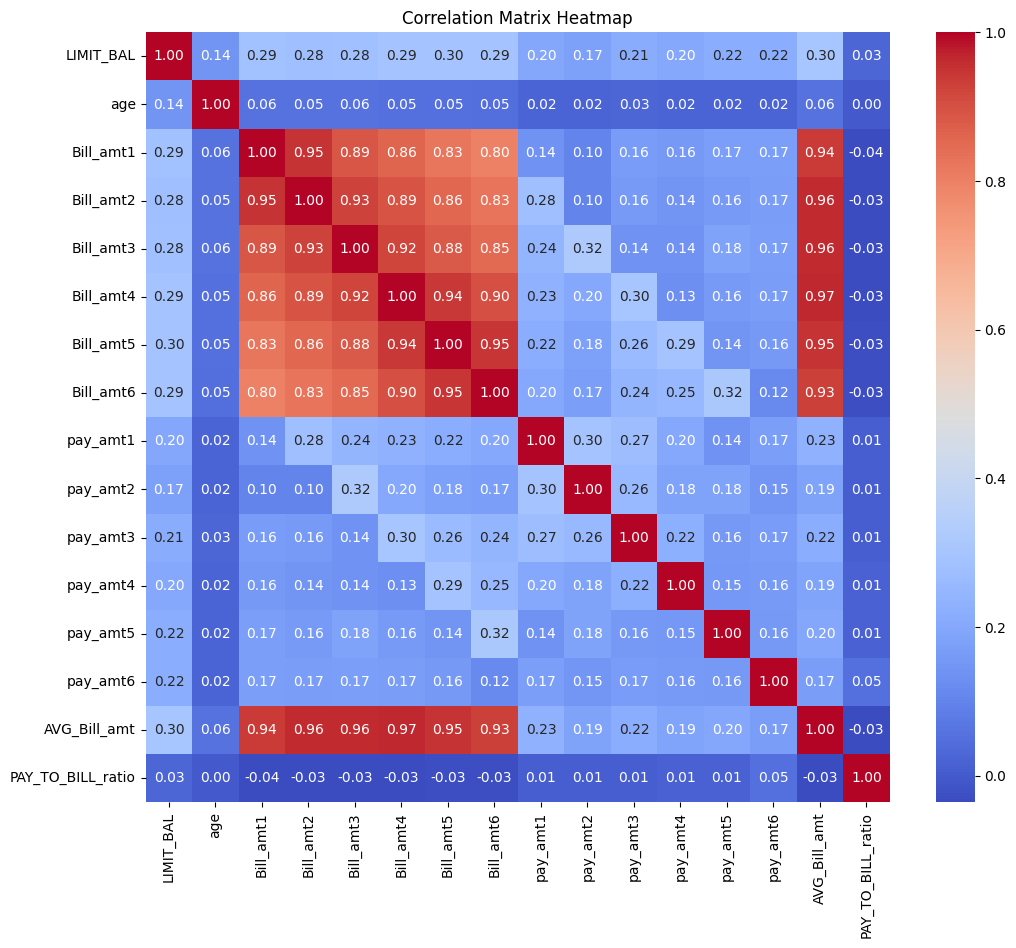

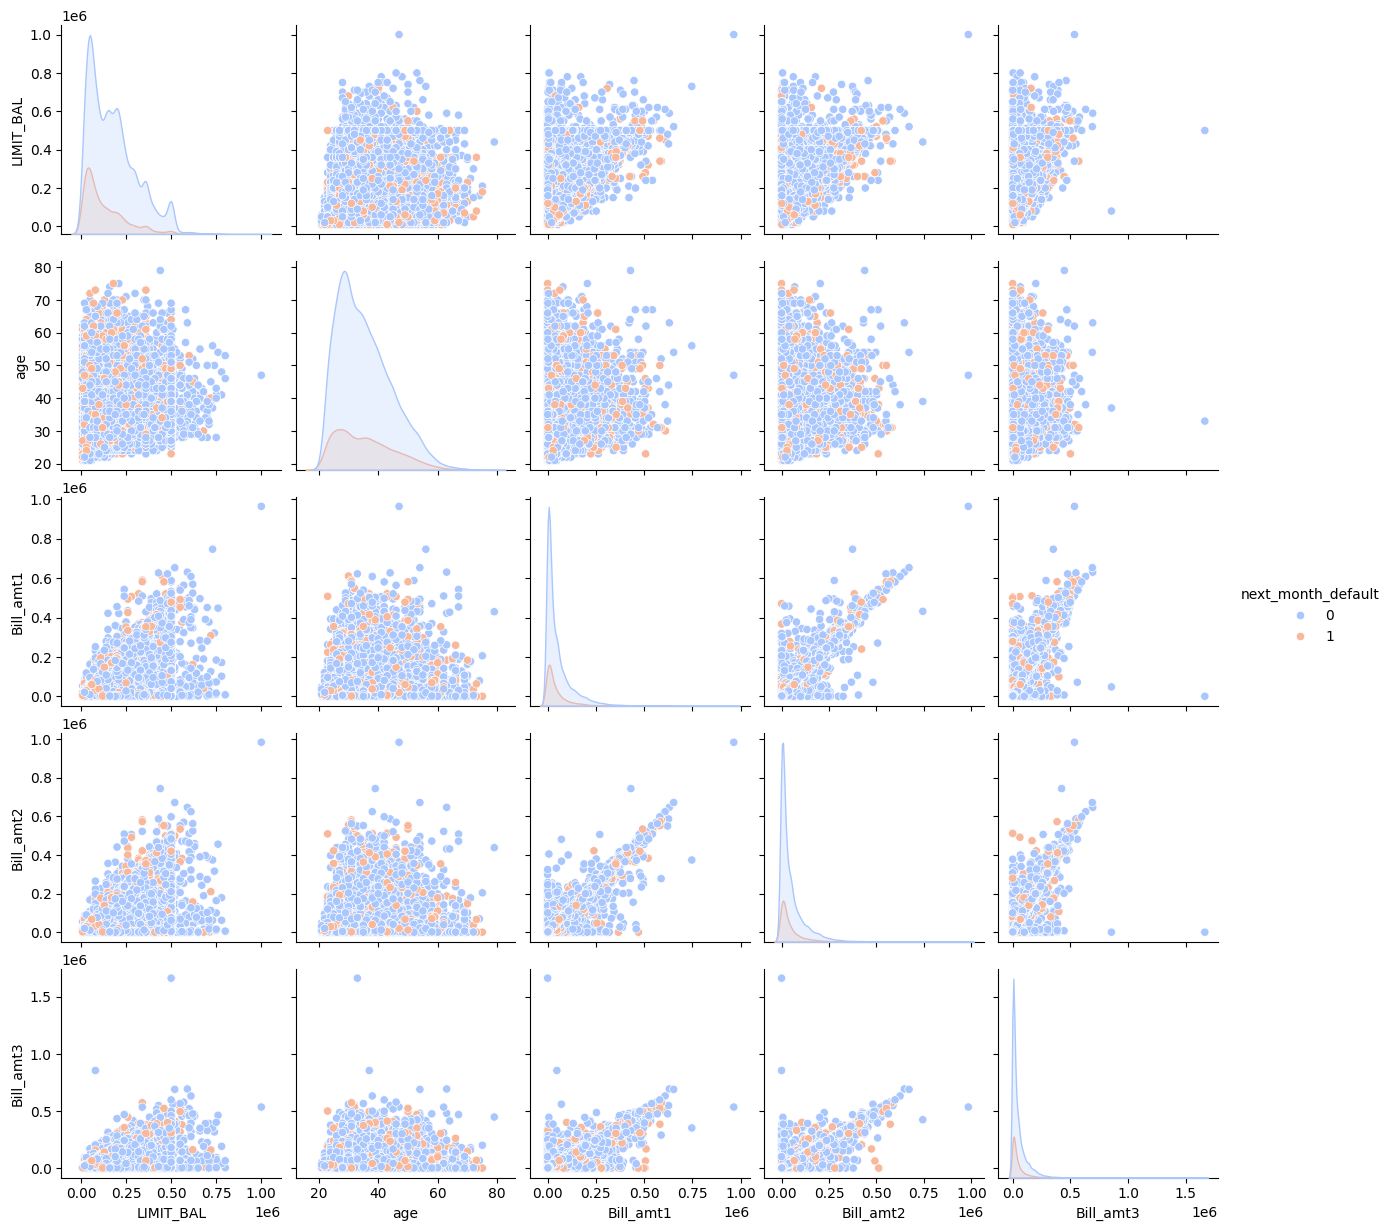

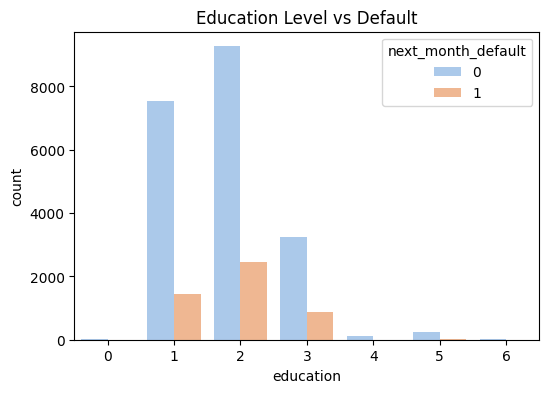

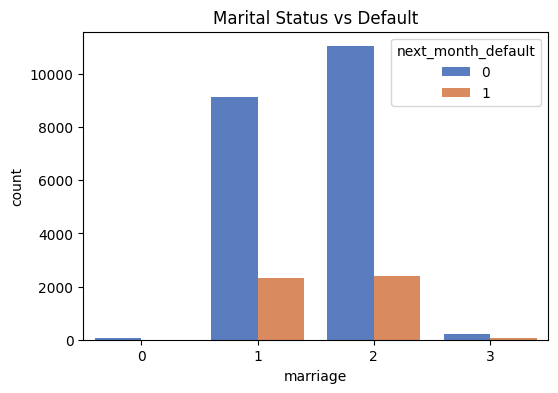

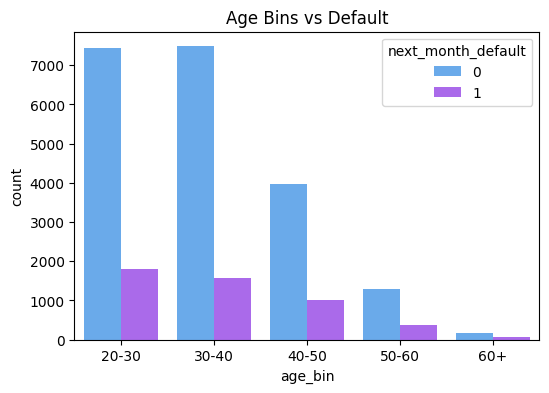

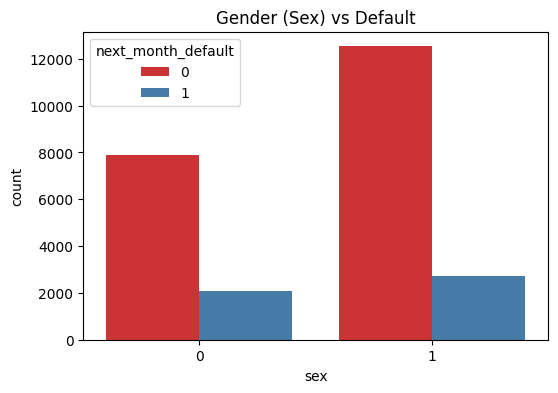

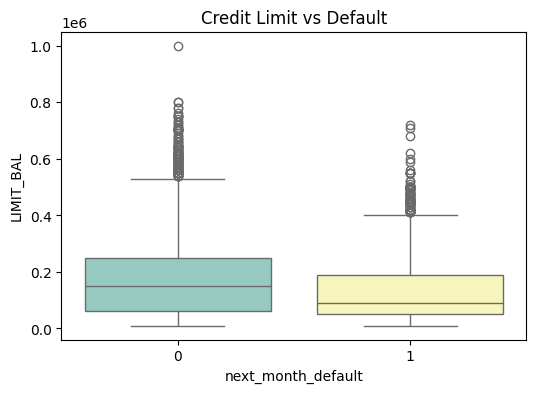

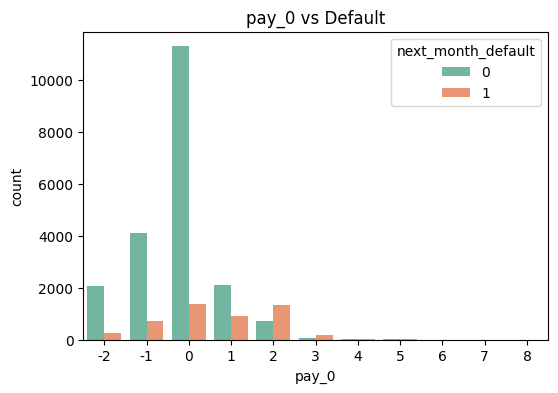

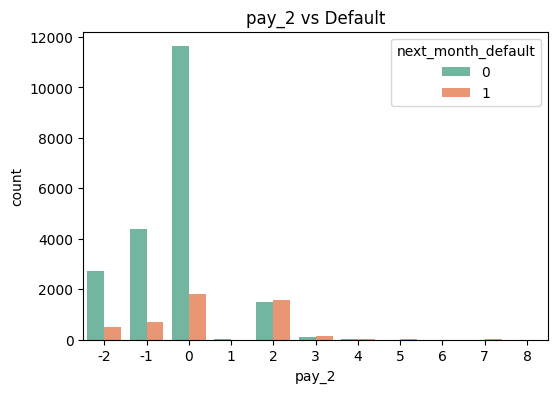

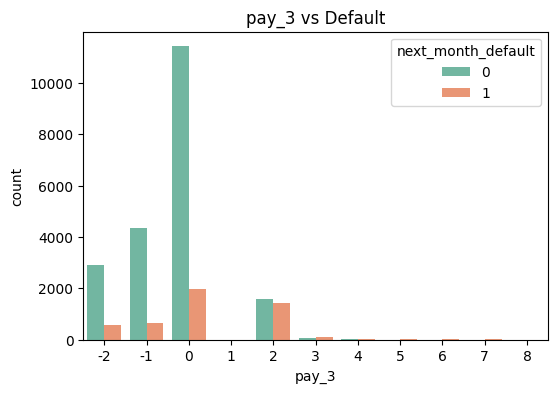

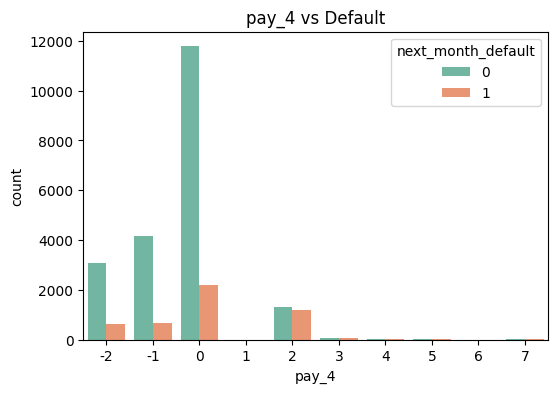

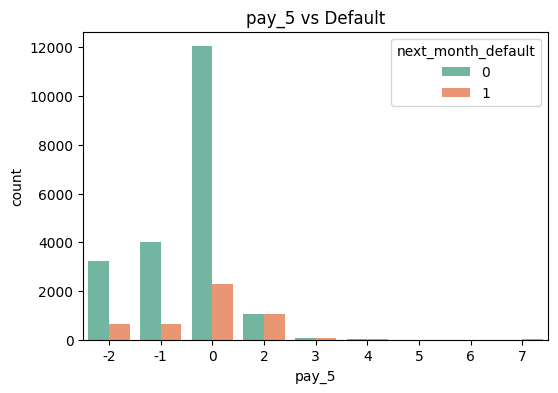

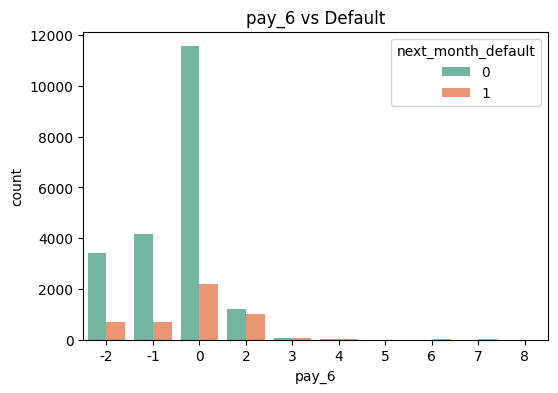

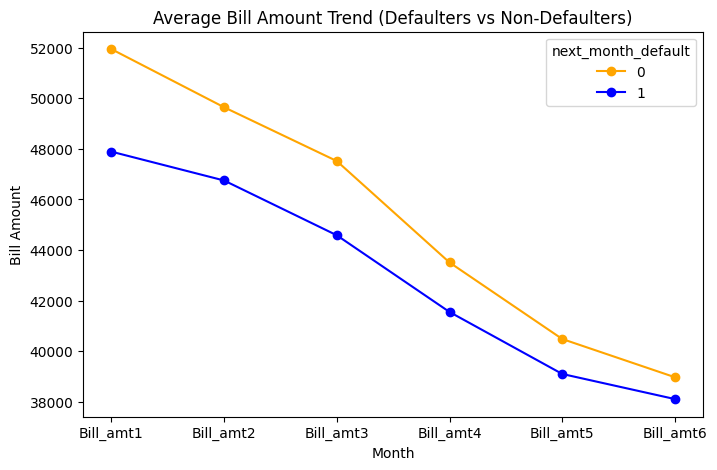

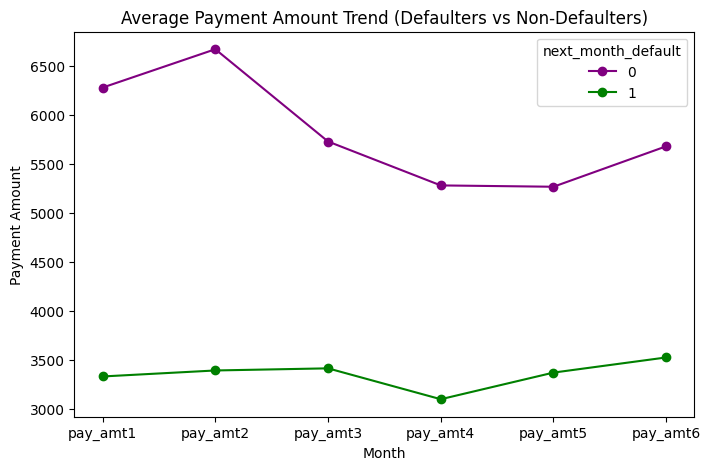

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# ---------------------- Basic Exploration ----------------------
print("Shape of the DataFrame:", train_df.shape)
print("\nData Types:\n", train_df.dtypes)

# ------------------ Distribution of Numerical Features -------------------
numerical_features = ['LIMIT_BAL', 'age', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 
                      'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 
                      'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 
                      'AVG_Bill_amt', 'PAY_TO_BILL_ratio']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 4, i + 1)
    sns.histplot(train_df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# ------------------ Distribution of Categorical Features -------------------
categorical_features = ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=train_df, palette='Set2')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# ------------------ Target Variable Distribution -------------------
plt.figure(figsize=(6, 4))
sns.countplot(x='next_month_default', data=train_df, palette='Set1')
plt.title('Distribution of Target Variable (Default vs Non-Default)')
plt.show()

# Pie Chart for Class Imbalance
class_counts = train_df['next_month_default'].value_counts()
labels = ['Non-Default (0)', 'Default (1)']
sizes = class_counts
colors = ['skyblue', 'salmon']
explode = (0.05, 0.05)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('Default vs Non-Default (Pie Chart)')
plt.axis('equal')
plt.show()

print("\nClass Imbalance:")
print(class_counts)
print((class_counts / len(train_df)) * 100)

# ------------------ Correlation Analysis -------------------
plt.figure(figsize=(12, 10))
sns.heatmap(train_df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# ------------------ Pairplot of Top 5 Numerical Features -------------------
sns.pairplot(train_df[numerical_features[:5] + ['next_month_default']], hue='next_month_default', palette='coolwarm')
plt.show()

# ------------------ EDA: Education vs Default -------------------
plt.figure(figsize=(6,4))
sns.countplot(x='education', hue='next_month_default', data=train_df, palette='pastel')
plt.title('Education Level vs Default')
plt.show()

# ------------------ EDA: Marital Status vs Default -------------------
plt.figure(figsize=(6,4))
sns.countplot(x='marriage', hue='next_month_default', data=train_df, palette='muted')
plt.title('Marital Status vs Default')
plt.show()

# ------------------ EDA: Age Binning vs Default -------------------
train_df['age_bin'] = pd.cut(train_df['age'], bins=[20,30,40,50,60,100], labels=['20-30','30-40','40-50','50-60','60+'])
plt.figure(figsize=(6,4))
sns.countplot(x='age_bin', hue='next_month_default', data=train_df, palette='cool')
plt.title('Age Bins vs Default')
plt.show()

# ------------------ EDA: Gender vs Default -------------------
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='next_month_default', data=train_df, palette='Set1')
plt.title('Gender (Sex) vs Default')
plt.show()

# ------------------ EDA: Credit Limit vs Default (Boxplot) -------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=train_df, palette='Set3')
plt.title('Credit Limit vs Default')
plt.show()

# ------------------ EDA: PAY_0 to PAY_6 vs Default -------------------
pay_cols = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
for col in pay_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='next_month_default', data=train_df, palette='Set2')
    plt.title(f'{col} vs Default')
    plt.show()

# ------------------ EDA: Average Bill Amount Trend -------------------
bill_cols = ['Bill_amt1','Bill_amt2','Bill_amt3','Bill_amt4','Bill_amt5','Bill_amt6']
train_df.groupby('next_month_default')[bill_cols].mean().T.plot(figsize=(8,5), marker='o', color=['orange','blue'])
plt.title('Average Bill Amount Trend (Defaulters vs Non-Defaulters)')
plt.xlabel('Month')
plt.ylabel('Bill Amount')
plt.show()

# ------------------ EDA: Average Payment Amount Trend -------------------
pay_amt_cols = ['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']
train_df.groupby('next_month_default')[pay_amt_cols].mean().T.plot(figsize=(8,5), marker='o', color=['purple','green'])
plt.title('Average Payment Amount Trend (Defaulters vs Non-Defaulters)')
plt.xlabel('Month')
plt.ylabel('Payment Amount')
plt.show()

In [7]:
print("\nDescriptive Statistics:\n", train_df.describe())


Descriptive Statistics:
         Customer_ID      marriage           sex     education       LIMIT_BAL  \
count  25247.000000  25247.000000  25247.000000  25247.000000    25247.000000   
mean   17640.000000      1.551907      0.604111      1.852101   168342.060443   
std     7288.325459      0.522629      0.489050      0.797379   129892.784807   
min     5017.000000      0.000000      0.000000      0.000000    10000.000000   
25%    11328.500000      1.000000      0.000000      1.000000    50000.000000   
50%    17640.000000      2.000000      1.000000      2.000000   140000.000000   
75%    23951.500000      2.000000      1.000000      2.000000   240000.000000   
max    30263.000000      3.000000      1.000000      6.000000  1000000.000000   

                age         pay_0         pay_2         pay_3         pay_4  \
count  25121.000000  25247.000000  25247.000000  25247.000000  25247.000000   
mean      35.438199     -0.042857     -0.159544     -0.190359     -0.241415   
std    

In [8]:
print("\nMissing Values:\n", train_df.isnull().sum())


Missing Values:
 Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
age_bin               126
dtype: int64


## Data cleaning


In [13]:
# --------------------------
# Data Cleaning and Preprocessing
# --------------------------

import numpy as np
from sklearn.preprocessing import LabelEncoder

# Handle Missing Values
for df in [train_df, validate_df]:
    # Impute missing 'age' with the median age
    df['age'].fillna(df['age'].median(), inplace=True)
    
    # Remove rows with missing 'Customer_ID' (as it's a unique identifier)
    df.dropna(subset=['Customer_ID'], inplace=True)

# Outlier Treatment (Winsorization at 1st and 99th percentiles)
numerical_features = [
    'LIMIT_BAL', 'age',
    'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
    'AVG_Bill_amt', 'PAY_TO_BILL_ratio'
]

for df in [train_df, validate_df]:
    for col in numerical_features:
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)
        df[col] = np.clip(df[col], lower_bound, upper_bound)

# Data Encoding for Categorical Features (Label Encoding)
categorical_cols = ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for df in [train_df, validate_df]:
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # ensure all data is string before encoding to avoid errors

# Data Consistency Checks
for df in [train_df, validate_df]:
    # Ensure 'pay_0' to 'pay_6' are within expected range (-2 to 8)
    pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
    for col in pay_cols:
        df[col] = np.clip(df[col], -2, 8)
    
    # 'LIMIT_BAL' should be within realistic bounds (based on domain knowledge)
    df['LIMIT_BAL'] = np.clip(df['LIMIT_BAL'], 10000, 1000000)
    
    # 'age' should be within 20 to 80 years
    df['age'] = np.clip(df['age'], 20, 80)

# Display cleaned datasets
display(train_df.head())
display(validate_df.head())


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,4,4,4,2,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,2,2,1,1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,60.0,2,2,2,2,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,2,2,2,2,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,1,1,1,1,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,2,2,2,2,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,0,0,0,2,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,2,2,2,2,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,2,2,2,4,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,2,2,2,2,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


## Feature Engineering

In [14]:
def create_financial_features(df):
    """Create financially meaningful features"""
    df = df.copy()
    
    # Payment Consistency Features
    pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
    df['avg_payment_delay'] = df[pay_cols].mean(axis=1)
    df['max_payment_delay'] = df[pay_cols].max(axis=1)
    df['payment_delay_consistency'] = df[pay_cols].std(axis=1).fillna(0)
    
    return df

# Apply feature engineering to both datasets
train_df = create_financial_features(train_df)
validate_df = create_financial_features(validate_df)

print("New features created:")
new_features = [col for col in train_df.columns if col not in ['Customer_ID', 'sex', 'education', 'marriage', 'age', 'LIMIT_BAL'] + 
                [f'pay_{i}' for i in [0,2,3,4,5,6]] + 
                [f'Bill_amt{i}' for i in range(1,7)] + 
                [f'pay_amt{i}' for i in range(1,7)] + 
                ['AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default']]
print(new_features)

New features created:
['avg_payment_delay', 'max_payment_delay', 'payment_delay_consistency']


In [15]:
def feature_engineering(df, is_train=True):
    # Drop unnecessary columns (conditionally drop Customer_ID)
    cols_to_drop = [
        'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', # explained by AVG_Bill_amt
        'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'       # explained by PAY_TO_BILL_ratio
    ]
    if is_train and 'Customer_ID' in df.columns:
        cols_to_drop.append('Customer_ID')  # Drop ID only in training

    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

    # Feature creation
    if all(col in df.columns for col in ['Bill_amt1', 'Bill_amt6']):
        df['bill_amt_trend'] = df['Bill_amt1'] - df['Bill_amt6']
    else:
        df['bill_amt_trend'] = 0

    pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
    if all(col in df.columns for col in pay_amt_cols):
        df['total_pay_amt'] = df[pay_amt_cols].sum(axis=1)
        df['pay_to_limit_ratio'] = df['total_pay_amt'] / df['LIMIT_BAL']
        df['pay_amt_std'] = df[pay_amt_cols].std(axis=1)
    else:
        df['pay_to_limit_ratio'] = 0
        df['pay_amt_std'] = 0

    pay_delay_cols = ['pay_0', 'pay_2']
    if all(col in df.columns for col in pay_delay_cols):
        df['recent_delay'] = df['pay_0'] + df['pay_2']
    else:
        df['recent_delay'] = 0

    if 'total_pay_amt' in df.columns:
        df = df.drop(columns=['total_pay_amt'], errors='ignore')

    return df

train_df = feature_engineering(train_df, is_train=True)     # Drop ID here
validate_df = feature_engineering(validate_df, is_train=False)  # Keep ID here

print("✅ Feature engineering applied to both train_df and validate_df.")
print("train_df shape:", train_df.shape)
print("validate_df shape:", validate_df.shape)


✅ Feature engineering applied to both train_df and validate_df.
train_df shape: (25247, 21)
validate_df shape: (5016, 21)


## Data preparation


In [16]:

# Separate features (X) and target variable (y)
X = train_df.drop('next_month_default', axis=1)
y = train_df['next_month_default']

# Fill NaN values in the target variable with the most frequent value
most_frequent_class = y.mode()[0]
y.fillna(most_frequent_class, inplace=True)

# Impute missing values in X using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Apply SMOTE to oversample the minority class
try:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
except ValueError as e:
    print(f"SMOTE error: {e}")
    exit(1)
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit(1)

# Combine the oversampled features and target variable back into a DataFrame
train_df_oversampled = pd.DataFrame(X_resampled, columns=X.columns)
train_df_oversampled['next_month_default'] = y_resampled

# Verify class distribution
print(train_df_oversampled['next_month_default'].value_counts())

next_month_default
0    20440
1    20440
Name: count, dtype: int64


## Data splitting



In [17]:
# Separate features (X) and target variable (y)
X = train_df_oversampled.drop('next_month_default', axis=1)
y = train_df_oversampled['next_month_default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes of the resulting DataFrames/Series
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (32704, 20)
X_val shape: (8176, 20)
y_train shape: (32704,)
y_val shape: (8176,)


## Model training

Train four classification models: Logistic Regression, Decision Tree, XGBoost, and LightGBM.


In [18]:


# Initialize models
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)  # Changed solver
decision_tree_model = DecisionTreeClassifier()
xgboost_model = XGBClassifier()
lightgbm_model = LGBMClassifier()

# Train models
logreg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)
lightgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4262
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

## Model optimization
Optimize the hyperparameters of the four trained models using RandomizedSearchCV.


In [19]:
# --- Define Pipelines ---
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=2000))
])

# --- Define Parameter Grids --
param_dist_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

param_dist_dt = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

param_dist_lgbm = {
    'n_estimators': [200, 300, 400, 500],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70, 100, 150],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'min_child_samples': [10, 20, 30, 50],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}


# --- Set up and Run RandomizedSearchCV ---
n_iter_search = 50 
scoring = {'f1': make_scorer(f1_score), 'roc_auc': make_scorer(roc_auc_score)}

# Initialize the search objects with n_jobs=-1 to use all CPU cores
random_search_logreg = RandomizedSearchCV(logreg_pipeline, param_distributions=param_dist_logreg, n_iter=10, cv=5, scoring=scoring, refit='f1', random_state=42, n_jobs=-1) # <-- ADD THIS
random_search_dt = RandomizedSearchCV(decision_tree_model, param_distributions=param_dist_dt, n_iter=n_iter_search, cv=5, scoring=scoring, refit='f1', random_state=42, n_jobs=-1) # <-- ADD THIS
random_search_xgb = RandomizedSearchCV(xgboost_model, param_distributions=param_dist_xgb, n_iter=n_iter_search, cv=5, scoring=scoring, refit='f1', random_state=42, n_jobs=-1) # <-- ADD THIS
random_search_lgbm = RandomizedSearchCV(lightgbm_model, param_distributions=param_dist_lgbm, n_iter=n_iter_search, cv=5, scoring=scoring, refit='f1', random_state=42, n_jobs=-1) # <-- ADD THIS

# Fit RandomizedSearchCV to the training data
print("Tuning Logistic Regression...")
random_search_logreg.fit(X_train, y_train)

print("Tuning Decision Tree...")
random_search_dt.fit(X_train, y_train)

print("Tuning XGBoost...")
random_search_xgb.fit(X_train, y_train)

print("Tuning LightGBM...")
random_search_lgbm.fit(X_train, y_train)

# Store the best estimators
best_logreg_model = random_search_logreg.best_estimator_
best_dt_model = random_search_dt.best_estimator_
best_xgb_model = random_search_xgb.best_estimator_
best_lgbm_model = random_search_lgbm.best_estimator_

print("Hyperparameter tuning complete!")

Tuning Logistic Regression...
Tuning Decision Tree...
Tuning XGBoost...
Tuning LightGBM...
[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4262
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Hyperparameter tuning complete!


## Model evaluation



In [20]:


# Predict using the best models
y_pred_logreg = best_logreg_model.predict(X_val)
y_pred_dt = best_dt_model.predict(X_val)
y_pred_xgb = best_xgb_model.predict(X_val)
y_pred_lgbm = best_lgbm_model.predict(X_val)

#predict using models before hyperparameter tuning
# y_pred_logreg = logreg_model.predict(X_val)
# y_pred_dt = decision_tree_model.predict(X_val)
# y_pred_xgb = xgboost_model.predict(X_val)
# y_pred_lgbm = lightgbm_model.predict(X_val)

# Evaluate performance
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return [model_name, accuracy, precision, recall, f1, roc_auc]

results = []
results.append(evaluate_model(y_val, y_pred_logreg, "Logistic Regression"))
results.append(evaluate_model(y_val, y_pred_dt, "Decision Tree"))
results.append(evaluate_model(y_val, y_pred_xgb, "XGBoost"))
results.append(evaluate_model(y_val, y_pred_lgbm, "LightGBM"))


# Create a summary table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"])
display(results_df)

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.713307,0.734535,0.668053,0.699718,0.713307
1,Decision Tree,0.876223,0.919531,0.824609,0.869487,0.876223
2,XGBoost,0.900318,0.948233,0.846869,0.894689,0.900318
3,LightGBM,0.901541,0.948130,0.849560,0.896142,0.901541


## Threshold optimization

In [21]:

# Get predicted probabilities (positive class)
y_pred_proba_lgbm = lightgbm_model.predict_proba(X_val)[:, 1]  # Probability of class 1

# Compute precision-recall pairs
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba_lgbm)

# Compute F2 score
beta = 2
f2_scores = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-8)

# Find best threshold for F2
best_f2_idx = np.argmax(f2_scores)
optimal_f2_threshold = thresholds[best_f2_idx]

# Print best values
print(f"📊 Best Threshold for LightGBM (F2): {optimal_f2_threshold:.4f}")
print(f"⭐ Best F2-Score: {f2_scores[best_f2_idx]:.4f}")
print(f"Precision at F2: {precisions[best_f2_idx]:.4f}")
print(f"Recall at F2: {recalls[best_f2_idx]:.4f}")


📊 Best Threshold for LightGBM (F2): 0.1666
⭐ Best F2-Score: 0.8933
Precision at F2: 0.7551
Recall at F2: 0.9362


## Model evaluation 2
Evaluate the best-performing model (LightGBM) on the held-out "validate_dataset_final.csv" dataset.


In [ ]:
# Complete Prediction and F2 Score Calculation


# Set the optimal F2 threshold from your optimization results
OPTIMAL_F2_THRESHOLD = 0.1666

print("="*60)
print("PART 1: PREDICTIONS ON VALIDATION DATASET (for submission)")
print("="*60)

# --- Preprocessing validate_df for submission ---
validate_df_processed = validate_df.copy()

# 1. Calculate credit utilization for validate_df
if 'Bill_amt1' in validate_df_processed.columns and 'LIMIT_BAL' in validate_df_processed.columns:
    validate_df_processed['LIMIT_BAL'] = validate_df_processed['LIMIT_BAL'].fillna(1)
    validate_df_processed['credit_utilization'] = np.where(
        validate_df_processed['LIMIT_BAL'] > 0,
        validate_df_processed['Bill_amt1'] / validate_df_processed['LIMIT_BAL'],
        0
    )
    print("✓ Credit utilization calculated for validate_df")
else:
    print("⚠ Warning: Missing columns for credit utilization calculation")
    validate_df_processed['credit_utilization'] = 0

# 2. Align validate_df with training features
if 'X_train' in locals():
    expected_features = X_train.columns.tolist()
    
    # Add missing features with default value 0
    for feature in expected_features:
        if feature not in validate_df_processed.columns:
            print(f"⚠ Adding missing feature '{feature}' as 0")
            validate_df_processed[feature] = 0
    
    # Select and order features to match training
    X_validate_aligned = validate_df_processed[expected_features]
    
    print(f"✓ Features aligned for validate_df. Shape: {X_validate_aligned.shape}")
    
    # --- Make Predictions on validate_df ---
    if 'best_lgbm_model' in locals():
        # Get probabilities
        validate_probabilities = best_lgbm_model.predict_proba(X_validate_aligned)[:, 1]
        
        # Apply optimal F2 threshold for binary predictions
        validate_predictions = (validate_probabilities >= OPTIMAL_F2_THRESHOLD).astype(int)
        
        print(f"\nValidation Dataset Prediction Summary:")
        print(f"Total predictions: {len(validate_predictions)}")
        print(f"Predicted defaults: {np.sum(validate_predictions)} ({np.mean(validate_predictions)*100:.2f}%)")
        print(f"Predicted non-defaults: {len(validate_predictions) - np.sum(validate_predictions)} ({100 - np.mean(validate_predictions)*100:.2f}%)")
        
        # --- Create and Save Submission File ---
        submission_df = pd.DataFrame({
            'Customer_ID': validate_df['Customer_ID'],
            'next_month_default': validate_predictions
        })
        
        # Save submission file (change filename to include your enrollment number)
        submission_filename = 'submission_f2_optimized.csv'  # Change this to submission_<YourEnrollmentNumber>.csv
        submission_df.to_csv(submission_filename, index=False)
        print(f"\n✓ Submission file saved as: {submission_filename}")
        print("First 10 predictions:")
        print(submission_df.head(10))
        
    else:
        print("❌ Error: best_lgbm_model not found")
else:
    print("❌ Error: X_train not found")

print("\n" + "="*60)
print("PART 2: F2 SCORE CALCULATION ON X_val")
print("="*60)

# --- Predictions on X_val for F2 score calculation ---
if 'X_val' in locals() and 'y_val' in locals() and 'best_lgbm_model' in locals():
    
    print(f"X_val shape: {X_val.shape}")
    print(f"y_val shape: {y_val.shape}")
    print(f"y_val distribution: {y_val.value_counts().to_dict()}")
    
    # Make predictions on X_val
    X_val_probabilities = best_lgbm_model.predict_proba(X_val)[:, 1]
    X_val_predictions = (X_val_probabilities >= OPTIMAL_F2_THRESHOLD).astype(int)
    
    print(f"\nX_val Prediction Summary:")
    print(f"Total predictions: {len(X_val_predictions)}")
    print(f"Predicted defaults: {np.sum(X_val_predictions)} ({np.mean(X_val_predictions)*100:.2f}%)")
    print(f"Actual defaults: {np.sum(y_val)} ({np.mean(y_val)*100:.2f}%)")
    
    # --- Calculate F2 Score ---
    f2_score = fbeta_score(y_val, X_val_predictions, beta=2)
    
    print(f"\n{'='*50}")
    print(f"🎯 FINAL F2 SCORE: {f2_score:.4f}")
    print(f"🎯 Threshold used: {OPTIMAL_F2_THRESHOLD}")
    print(f"{'='*50}")
    
    # Additional metrics for comprehensive evaluation
    print(f"\n📊 DETAILED METRICS:")
    print(f"Accuracy:  {accuracy_score(y_val, X_val_predictions):.4f}")
    print(f"Precision: {precision_score(y_val, X_val_predictions):.4f}")
    print(f"Recall:    {recall_score(y_val, X_val_predictions):.4f}")
    print(f"F1 Score:  {f1_score(y_val, X_val_predictions):.4f}")
    print(f"F2 Score:  {f2_score:.4f}")
    
    # Confusion Matrix
    print(f"\n📈 CONFUSION MATRIX:")
    cm = confusion_matrix(y_val, X_val_predictions)
    print(f"                 Predicted")
    print(f"               0      1")
    print(f"Actual 0    {cm[0,0]:4d}   {cm[0,1]:4d}")
    print(f"       1    {cm[1,0]:4d}   {cm[1,1]:4d}")
    
    print(f"\nBreakdown:")
    print(f"True Negatives:  {cm[0,0]:4d} (correctly predicted no default)")
    print(f"False Positives: {cm[0,1]:4d} (incorrectly predicted default)")
    print(f"False Negatives: {cm[1,0]:4d} (missed actual defaults)")
    print(f"True Positives:  {cm[1,1]:4d} (correctly predicted default)")
    
    # Classification Report
    print(f"\n📋 CLASSIFICATION REPORT:")
    print(classification_report(y_val, X_val_predictions))
    
    # Save detailed results
    results_df = pd.DataFrame({
        'actual': y_val,
        'predicted': X_val_predictions,
        'probability': X_val_probabilities
    })
    results_df.to_csv('validation_results_detailed.csv', index=False)
    print(f"\n✓ Detailed validation results saved to: validation_results_detailed.csv")
    
else:
    print("❌ Error: Required variables not found (X_val, y_val, or best_lgbm_model)")
    print("Please ensure you have run the train-test split and model training cells")

# Summary
print(f"\n{'='*60}")
print("📋 SUMMARY")
print(f"{'='*60}")
print("✅ Submission file created for validate_df")
if 'f2_score' in locals():
    print(f"✅ F2 Score calculated on validation split: {f2_score:.4f}")
print(f"✅ Optimal threshold used: {OPTIMAL_F2_THRESHOLD}")
print("✅ Ready for submission!")

PART 1: PREDICTIONS ON VALIDATION DATASET (for submission)
⚠ Warning: Missing columns for credit utilization calculation
✓ Features aligned for validate_df. Shape: (5016, 20)

Validation Dataset Prediction Summary:
Total predictions: 5016
Predicted defaults: 1895 (37.78%)
Predicted non-defaults: 3121 (62.22%)

✓ Submission file saved as: submission_f2_optimized.csv
First 10 predictions:
   Customer_ID  next_month_default
0            1                   0
1            2                   0
2            3                   0
3            4                   1
4            5                   0
5            6                   0
6            7                   1
7            8                   0
8            9                   0
9           10                   0

PART 2: F2 SCORE CALCULATION ON X_val
X_val shape: (8176, 20)
y_val shape: (8176,)
y_val distribution: {1: 4088, 0: 4088}

X_val Prediction Summary:
Total predictions: 8176
Predicted defaults: 5008 (61.25%)
Actual defaults: 

## Business impact analysis

In [23]:
#cell 11.5 - Business Impact Analysis
from sklearn.metrics import confusion_matrix
def calculate_business_impact(y_true, y_pred, loan_amount_avg=50000):
    """Calculate business impact of the model"""
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Assume average loan amount and costs
    avg_loan = loan_amount_avg
    cost_of_default = avg_loan * 0.4  # 40% loss on default
    cost_of_investigation = avg_loan * 0.05  # 5% cost to investigate/reject
    
    # Calculate costs
    cost_false_negatives = fn * cost_of_default  # Missed defaults
    cost_false_positives = fp * cost_of_investigation  # Unnecessary investigations
    total_cost = cost_false_negatives + cost_false_positives
    
    # Potential savings compared to no model
    total_defaults = tp + fn
    cost_without_model = total_defaults * cost_of_default
    savings = cost_without_model - total_cost
    
    print(f"Business Impact Analysis:")
    print(f"Total Cost with Model: ${total_cost:,.2f}")
    print(f"Cost without Model: ${cost_without_model:,.2f}")
    print(f"Potential Savings: ${savings:,.2f}")
    print(f"Cost of False Negatives: ${cost_false_negatives:,.2f}")
    print(f"Cost of False Positives: ${cost_false_positives:,.2f}")
    
    return savings

# Calculate business impact
business_savings = calculate_business_impact(y_val, y_pred_lgbm)

Business Impact Analysis:
Total Cost with Model: $12,255,000.00
Cost without Model: $81,760,000.00
Potential Savings: $69,505,000.00
Cost of False Negatives: $11,780,000.00
Cost of False Positives: $475,000.00


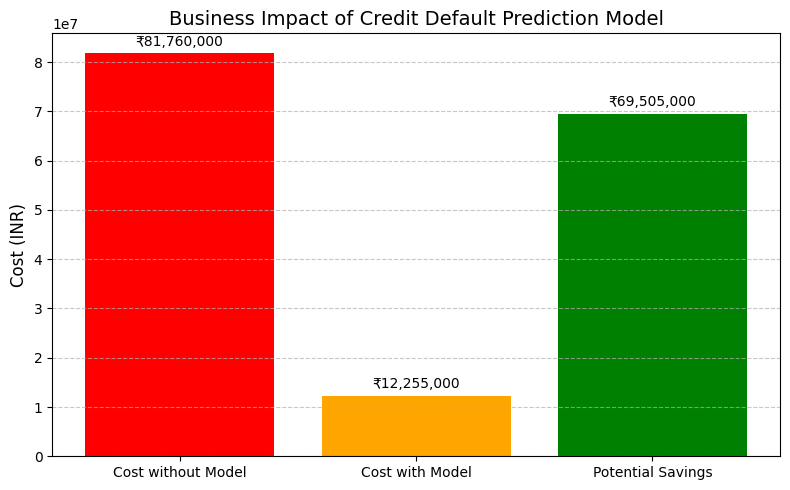

In [10]:
import matplotlib.pyplot as plt

# Define values
cost_without_model = 81760000   # ₹81,760,000
cost_with_model = 12255000      # ₹12,255,000
savings = 69505000              # ₹69,505,000

# Bar chart
labels = ['Cost without Model', 'Cost with Model', 'Potential Savings']
values = [cost_without_model, cost_with_model, savings]
colors = ['red', 'orange', 'green']

plt.figure(figsize=(8,5))
bars = plt.bar(labels, values, color=colors)

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e6, f'₹{yval:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Business Impact of Credit Default Prediction Model', fontsize=14)
plt.ylabel('Cost (INR)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
